# __Compte rendu CC1 MNP__
## __LECLAIR Raphaël 21303231__

## Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Partie I

In [2]:
#Question 1
n=np.linspace(0,50,51) #tableau conteanant les 51 valeurs de n de 0 à 50 inclus
tau=0.5
t=n+tau*np.sqrt(n)
print(t)

[ 0.          1.5         2.70710678  3.8660254   5.          6.11803399
  7.22474487  8.32287566  9.41421356 10.5        11.58113883 12.6583124
 13.73205081 14.80277564 15.87082869 16.93649167 18.         19.06155281
 20.12132034 21.17944947 22.23606798 23.29128785 24.34520788 25.39791576
 26.44948974 27.5        28.54950976 29.59807621 30.64575131 31.6925824
 32.73861279 33.78388218 34.82842712 35.87228132 36.91547595 37.95803989
 39.         40.04138127 41.082207   42.122499   43.16227766 44.20156212
 45.24037035 46.27871926 47.31662479 48.35410197 49.39116499 50.4278273
 51.46410162 52.5        53.53553391]


In [3]:
#Question 2
print(f"La condition t1=1.5 est {t[1]==1.5}, t4=5 est {t[4]==5}, t9=10.5 est {t[9]==10.5}, t16=18 est {t[16]==18}, t25=27.5 est {t[25]==27.5}.")

La condition t1=1.5 est True, t4=5 est True, t9=10.5 est True, t16=18 est True, t25=27.5 est True.


In [4]:
#Question 3
t2=np.arange(t[2]-1,t[2]+0.01,0.01) #tableau contenant des valeurs de t de t2-1 à t2 avec un pas de 0.01
                                    #afin d'avoir une bonne représentation des courbes vx et vy
t4=np.arange(t[4]-1,t[4]+0.01,0.01)

def v1x(tk,n):
    """ Renvoie un tableau numpy avec
        les valeurs de vx en fonction
        d'une valeur de n et des 
        valeurs de temps dans le 
        tableau numpy tk (où t varie de
        t_{n+1}-1 à t_{n+1}) en paramètres
    """
    e=(-1)**n
    return e*np.sqrt(n+1)*np.sin(np.pi*(tk-t[n+1]))  #tk[-1] représente la dernière valeur de tk, soit t_{n+1} dans la formule plus haut

def v1y(tk,n):
    """ Renvoie un tableau numpy avec
        les valeurs de vy en fonction
        d'une valeur de n et des 
        valeurs de temps dans le 
        tableau numpy tk (où t varie de
        t_{n+1}-1 à t_{n+1}) en paramètres
    """
    e=(-1)**n
    return -e*np.sqrt(n+1)*np.cos(np.pi*(tk-t[n+1]))

v_x2=v1x(t2,2)
v_y2=v1y(t2,2)

v_x4=v1x(t4,2)
v_y4=v1y(t4,2)

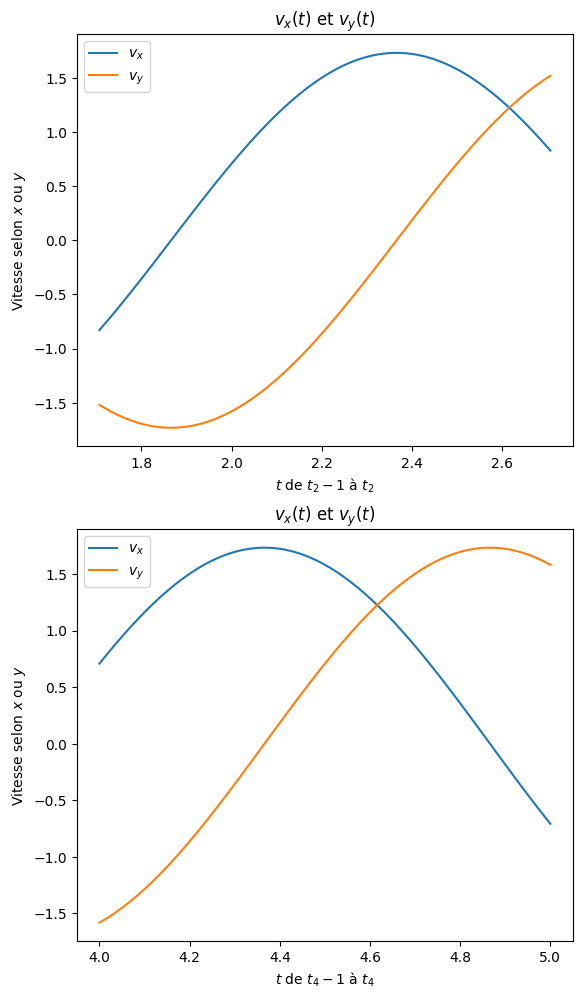

In [5]:
#Question 4

#Premier graphe
plt.subplot(2,1,1)
plt.plot(t2,v_x2, label="$v_x$")
plt.plot(t2,v_y2, label="$v_y$")
plt.xlabel("$t$ de $t_2-1$ à $t_2$")
plt.ylabel("Vitesse selon $x$ ou $y$")
plt.title("$v_x(t)$ et $v_y(t)$")
plt.legend()

#Deuxième graphe
plt.subplot(2,1,2)
plt.plot(t4,v_x4, label="$v_x$")
plt.plot(t4,v_y4, label="$v_y$")
plt.xlabel("$t$ de $t_4-1$ à $t_4$")
plt.ylabel("Vitesse selon $x$ ou $y$")
plt.title("$v_x(t)$ et $v_y(t)$")
plt.legend()

#Affichage
plt.subplots_adjust(top = 2) # Agrandit l'espace entre les figures
plt.show()

In [6]:
#Question 5
max_vx2=max(abs(v_x2))
max_vy2=max(abs(v_y2))

max_vx4=max(abs(v_x4))
max_vy4=max(abs(v_y4))

print(f"Les valeurs de maximum trouvées pour v_x2 et v_y2 sont: {max_vx2:.3f} et {max_vy2:.3f}.") #on ne garde que 3 chiffres après la virgule
print(f"Les valeurs de maximum trouvées pour v_x4 et v_y4 sont: {max_vx4:.3f} et {max_vy4:.3f}.")

Les valeurs de maximum trouvées pour v_x2 et v_y2 sont: 1.732 et 1.732.
Les valeurs de maximum trouvées pour v_x4 et v_y4 sont: 1.732 et 1.732.


Les courbes de $v_x$ pour $t_2$ et $t_4$ sont respectivement sensées commencer et finir en 0, cependant elles ne le font pas ici.\
De plus on trouve les mêmes valeurs de maximum pour $v_x$ et $v_y$ et pour $t_2$ et $t_4$, cela n'est pas cohérent avec l'accélération de la particule.\
Je n'ai pas eu le temps de trouver les raisons.

# Partie II

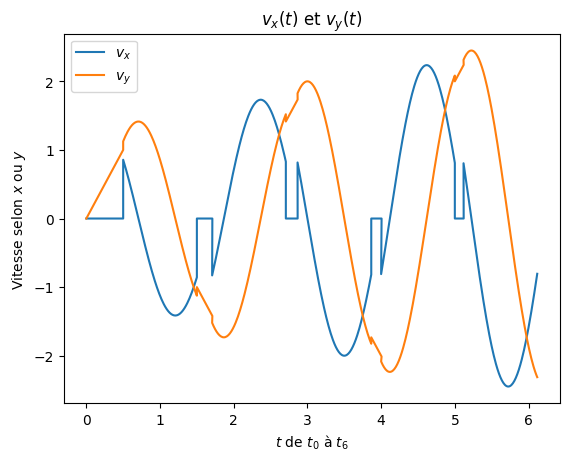

In [7]:
#Question 6

vx=np.array([])
vy=np.array([])
T=np.array([])

def v2y(tk,n):
    """ Renvoie un tableau numpy avec
        les valeurs de vy en fonction
        d'une valeur de n et des 
        valeurs de temps dans le 
        tableau numpy tk (où t varie de
        t_{n} à t_{n+1}-1) en paramètres
    """
    e=(-1)**n
    return e*(np.sqrt(n)+(tk-t[n])/tau)

for m in range(1,6): #on prends des valeurs de m(=n+1) de 1 à 6
    t1=np.arange(t[m-1],t[m]-1+0.01, 0.01) #t entre t_n et t_{n+1}-1
    t2=np.arange(t[m]-1,t[m]+0.01, 0.01) #t entre t_{n+1}-1 et t_{n+1}
    T=np.append(T,t1)
    T=np.append(T,t2)
    
    vx=np.append(vx,0*t1)
    vy=np.append(vy,v2y(t1,m-1))
    
    vx=np.append(vx,v1x(t2,m))
    vy=np.append(vy,v1y(t2,m))
    
#Affichage
plt.plot(T,vx, label="$v_x$")
plt.plot(T,vy, label="$v_y$")
plt.xlabel("$t$ de $t_0$ à $t_6$")
plt.ylabel("Vitesse selon $x$ ou $y$")
plt.title("$v_x(t)$ et $v_y(t)$")
plt.legend()
plt.show()

Les lignes droites verticales dans les graphes de vx et vy sont dus aux discontinuités des courbes,\
comme pour la question 4.

Sinon on voit vien que les courbes de $v_x$ et $v_y$ forment des sinus et cosinus qui s'agrandissent,\
cela est cohérent avec l'accélération de la particule due aux champs électrique constant, en effet\
si on reliait les différents pics des courbes de $v_x$ ou $v_y$ on formerait bien des droites.

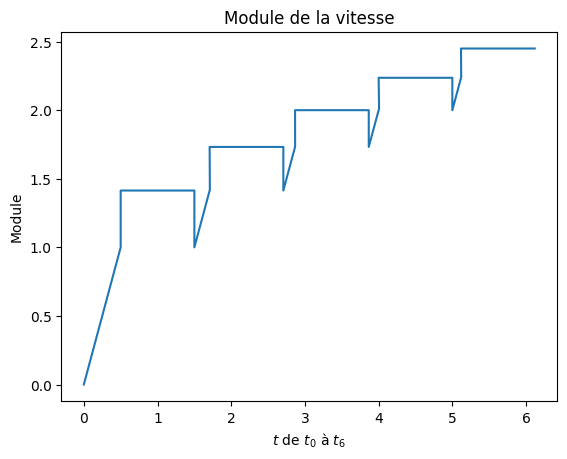

In [8]:
#Question 7

def module(a,b):
    return np.sqrt(a**2+b**2)

mod=module(vx,vy)

#Affichage
plt.plot(T,mod)
plt.xlabel("$t$ de $t_0$ à $t_6$")
plt.ylabel("Module")
plt.title("Module de la vitesse")
plt.show()

On voit sur ce graphe le but d'un cyclotron, il sert à accéler par paliers entre ses différentes zones une particule chargée.

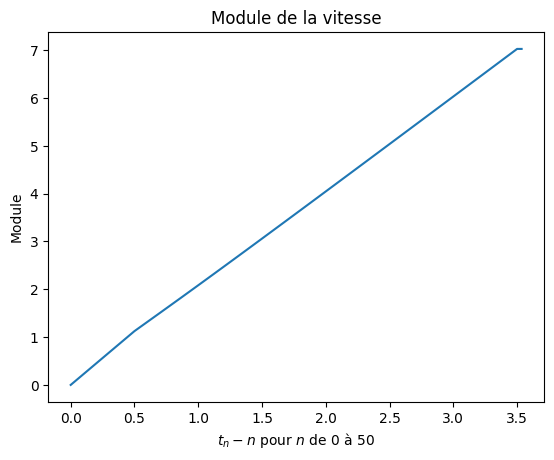

In [9]:
#Question 8
#Les instants t_n pour n de 0 à 50 sont ceux pour lesquels la particule
#sort des D, on aura donc vx=0 pour tous les tn

vx=np.zeros(51)
vy=[]
for N in range(0,50):
    e=(-1)**N
    vy.append(-e*np.sqrt(N+1)*np.cos(np.pi*(t[N]-t[N+1])))
vy.append(vy[-1]) #on rajoute la dernière valeur une deuxième fois pour
                  #que vy et tn-n aient la même taille
vy=np.array(vy)
    
mod=module(vx,vy)

#Affichage
plt.plot(t-n,mod)
plt.xlabel("$t_n-n$ pour $n$ de 0 à 50")
plt.ylabel("Module")
plt.title("Module de la vitesse")
plt.show()

On voit bien, en accord avec la dernière question, que la vitesse de la particule augmente progressivement à chaque passage.